# 算法原理

t-SNE(t-分布随机邻域嵌入)是由SNE衍生出的一种算法，SNE最早出现在2002年，它改变了MDS和ISOMAP中基于距离不变的思想，将高维映射到低维的同时，尽量**保证相互之间的分布概率不变**，SNE将高维和低维中的样本分布都看作高斯分布，而t-SNE将低维中的坐标当做T分布，这样做的好处是为了让距离大的簇之间距离拉大，从而解决了拥挤问题。

t-SNE是一种集降维与可视化于一体的技术，它是基于SNE可视化的改进，解决了SNE在可视化后样本分布拥挤、边界不明显的特点，是目前较好的**降维可视化**手段。

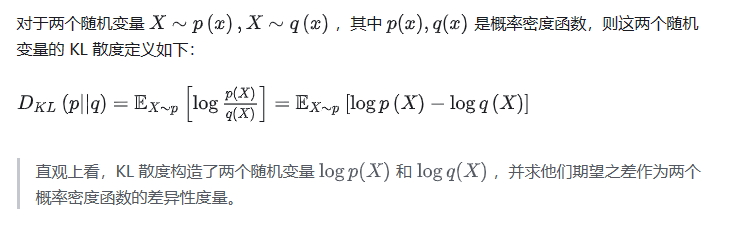

t-SNE是目前来说效果最好的数据降维与可视化方法，但是它的缺点也很明显，比如：

- 占内存大，运行时间长。
- 专用于可视化，不能用于数据转换，即嵌入空间只能是2维或3维。
- 需要尝试不同的初始化点，以防止局部次优解的影响。

但是，当我们想要对高维数据进行分类，又不清楚这个数据集有没有很好的可分性（即同类之间间隔小，异类之间间隔大），可以通过t-SNE投影到2维或者3维的空间中观察一下。如果在低维空间中具有可分性，则数据是可分的；如果在高维空间中不具有可分性，可能是数据不可分，也可能仅仅是因为不能投影到低维空间。

# 数据准备

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#读取数据
data = pd.read_csv("../data/breast_cancer.csv")
print(data.head())

       0      1       2       3        4        5       6        7       8  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

         9  ...     21      22      23      24      25      26      27  \
0  0.07871  ...  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  label  
0  0.4601  0.11890      0  
1  0.2750  0.08902      0  
2 

In [3]:
#准备数据
data = data.dropna()
y = data['label']
x = data.drop(['label'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

# 模型训练

In [4]:
model = TSNE(n_components=2)
model.fit(x_train)
model.embedding_.shape # 流形嵌入

(426, 2)

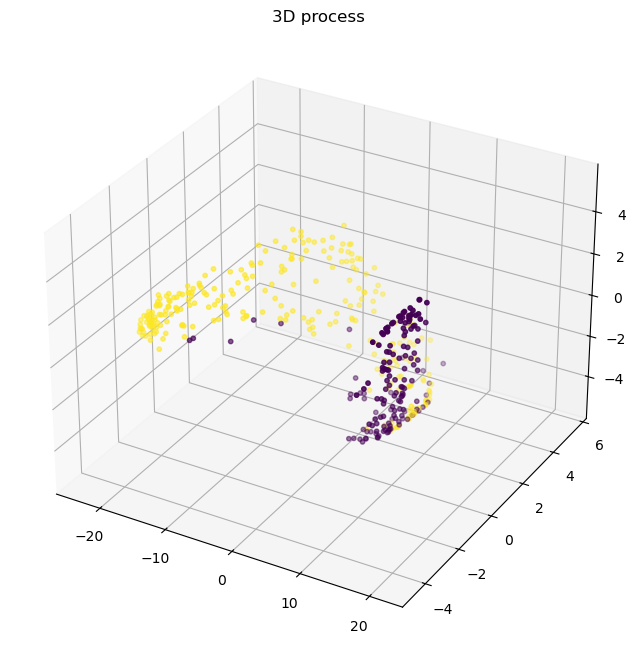

In [6]:
# 绘制三维效果图
model = TSNE(n_components=3)
model.fit(x_train)
x_new = model.fit_transform(x_train)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_title('3D process')
ax.scatter(x_new[:,0], x_new[:,1], x_new[:,2] , c=y_train, s=10)

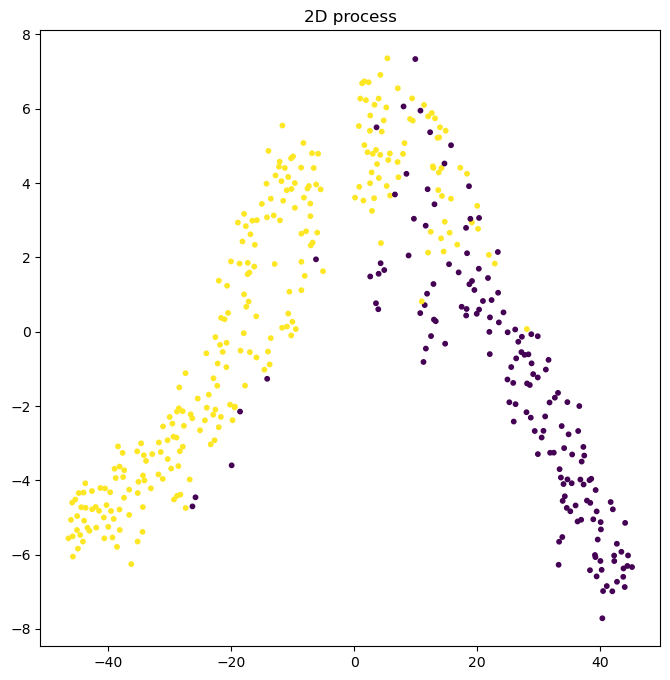

In [8]:
# 绘制二维效果图
model = TSNE(n_components=2)
model.fit(x_train)
x_new = model.fit_transform(x_train)
plt.figure(figsize=(8, 8))
plt.title('2D process')
plt.scatter(x_new[:,0], x_new[:,1], c=y_train, s=10)

# 模型保存

In [9]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../test/best_models/tsne.pkl')

# 加载模型
model = joblib.load('../test/best_models/tsne.pkl')

In [10]:
# 法二
import pickle

with open('../test/best_models/tsne.pkl', 'wb') as f:
    pickle.dump(model, f)
 
#读取Model
with open('../test/best_models/tsne.pkl', 'rb') as f:
    model = pickle.load(f)